# introducion to Regression

Written by:
- Manuel Szewc (School of Physics, University of Cincinnati)
- Philip Ilten (School of Physics, University of Cincinnati)
$\renewcommand{\gtrsim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{>}{\sim}$\hspace{1mm}}}\renewcommand{\lessim}{\raisebox{-2mm}{\hspace{1mm}$\stackrel{<}{\sim}$\hspace{1mm}}}\renewcommand{\as}{\alpha_{\mathrm{s}}}\renewcommand{\aem}{\alpha_{\mathrm{em}}}\renewcommand{\kT}{k_{\perp}}\renewcommand{\pT}{p_{\perp}}\renewcommand{\pTs}{p^2_{\perp}}\renewcommand{\pTe}{\p_{\perp\mrm{evol}}}\renewcommand{\pTse}{\p^2_{\perp\mrm{evol}}}\renewcommand{\pTmin}{p_{\perp\mathrm{min}}}\renewcommand{\pTsmim}{p^2_{\perp\mathrm{min}}}\renewcommand{\pTmax}{p_{\perp\mathrm{max}}}\renewcommand{\pTsmax}{p^2_{\perp\mathrm{max}}}\renewcommand{\pTL}{p_{\perp\mathrm{L}}}\renewcommand{\pTD}{p_{\perp\mathrm{D}}}\renewcommand{\pTA}{p_{\perp\mathrm{A}}}\renewcommand{\pTsL}{p^2_{\perp\mathrm{L}}}\renewcommand{\pTsD}{p^2_{\perp\mathrm{D}}}\renewcommand{\pTsA}{p^2_{\perp\mathrm{A}}}\renewcommand{\pTo}{p_{\perp 0}}\renewcommand{\shat}{\hat{s}}\renewcommand{\a}{{\mathrm a}}\renewcommand{\b}{{\mathrm b}}\renewcommand{\c}{{\mathrm c}}\renewcommand{\d}{{\mathrm d}}\renewcommand{\e}{{\mathrm e}}\renewcommand{\f}{{\mathrm f}}\renewcommand{\g}{{\mathrm g}}\renewcommand{\hrm}{{\mathrm h}}\renewcommand{\lrm}{{\mathrm l}}\renewcommand{\n}{{\mathrm n}}\renewcommand{\p}{{\mathrm p}}\renewcommand{\q}{{\mathrm q}}\renewcommand{\s}{{\mathrm s}}\renewcommand{\t}{{\mathrm t}}\renewcommand{\u}{{\mathrm u}}\renewcommand{\A}{{\mathrm A}}\renewcommand{\B}{{\mathrm B}}\renewcommand{\D}{{\mathrm D}}\renewcommand{\F}{{\mathrm F}}\renewcommand{\H}{{\mathrm H}}\renewcommand{\J}{{\mathrm J}}\renewcommand{\K}{{\mathrm K}}\renewcommand{\L}{{\mathrm L}}\renewcommand{\Q}{{\mathrm Q}}\renewcommand{\R}{{\mathrm R}}\renewcommand{\T}{{\mathrm T}}\renewcommand{\W}{{\mathrm W}}\renewcommand{\Z}{{\mathrm Z}}\renewcommand{\bbar}{\overline{\mathrm b}}\renewcommand{\cbar}{\overline{\mathrm c}}\renewcommand{\dbar}{\overline{\mathrm d}}\renewcommand{\fbar}{\overline{\mathrm f}}\renewcommand{\pbar}{\overline{\mathrm p}}\renewcommand{\qbar}{\overline{\mathrm q}}\renewcommand{\rbar}{\overline{\mathrm{r}}}\renewcommand{\sbar}{\overline{\mathrm s}}\renewcommand{\tbar}{\overline{\mathrm t}}\renewcommand{\ubar}{\overline{\mathrm u}}\renewcommand{\Bbar}{\overline{\mathrm B}}\renewcommand{\Fbar}{\overline{\mathrm F}}\renewcommand{\Qbar}{\overline{\mathrm Q}}\renewcommand{\tms}{{t_{\mathrm{\tiny MS}}}}\renewcommand{\Oas}[1]{{\mathcal{O}\left(\as^{#1}\right)}}$

This notebook wants to implement simple Machine Learning algorithms to deal with regression problems. Let's first import some basic libraries.

In [1]:
import os

# To generate data and handle arrays
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

## Theory

Regression seeks to model a dependent variable $t$ as a function of an independent variable $x$ (with arbitrary dimensionalities). The basic assumption is that $t$ is randomly sampled from a deterministic function $y(x)$ such that:

$$t\sim \mathcal{N}(y(x,w),\sigma^{2})$$

where the uncertainty $\sigma$ could be measurement specific (what is called an heterocedastic problem). In this notebook we assume a shared uncertainty (what is usually called the homocedasticity assumption).

Let's now deal with the simplest case. Assume both $t$ and $x$ are one-dimensional and we assume a linear relationship:

$$y(x,w)=w_{0}+w_{1}x$$

This is of course an assumption which is never likely exact. Part of the problem is defining a good enough parameterization (and characterizing what good enough means!).

In [2]:
N_SAMPLES = 20
x = np.linspace(0, 1, num=N_SAMPLES).reshape(-1, 1)
t = 4 * x + np.sin(x * 6) + 0.5 * np.random.randn(N_SAMPLES, 1)

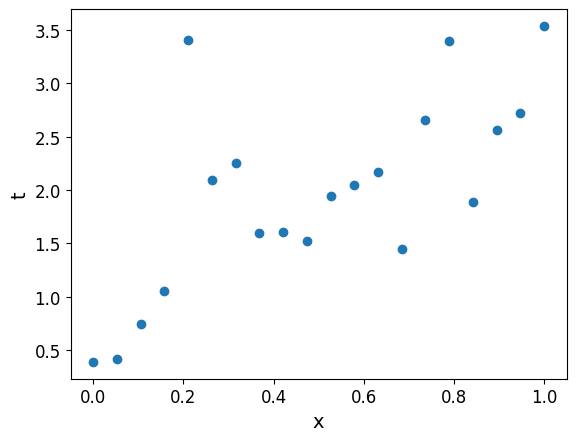

In [3]:
plt.scatter(x, t)
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [4]:
def y_true(x):
    return 4 * x + np.sin(x * 6)

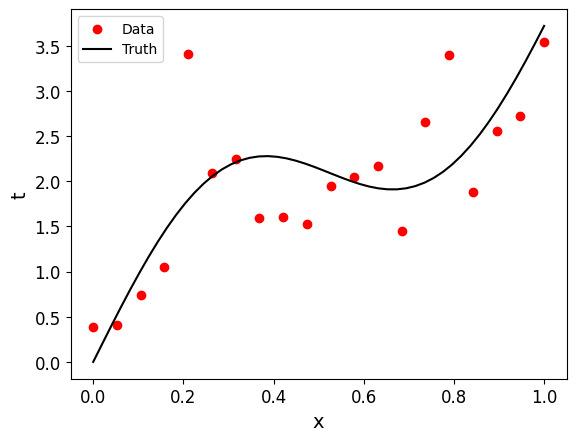

In [5]:
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Data")
plt.plot(xvals, y_true(xvals), color="black", label="Truth")
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

For any model $y(x,w)$, we need to estimate convenient values for the parameters $w$. A very common choice is to obtain the parameters $w_{\mathrm{MLE}}$ that maximize the joint probability of all measurements (which is also called the likelihood of the parameters). These are called the **maximum likelihood estimates (MLE)**.

For numerical convenience, it is almost always more useful to maximize the log-likelihood (or minimize the negative log-likelihood). For $N$ independent measurements with gaussian errors, we have that

$$\ln \mathcal{L}(w) = \sum_{n=1}^{N} \ln p(t_{n}|x_{n},w)$$

$$\ln \mathcal{L}(w) = \sum_{n=1}^{N} -\frac{(t_{n}-y(x_{n},w))}{2\sigma^{2}} + \text{terms independent of $w$}$$

and we recover the usual $\chi^{2}$ statistic for goodness of fit. Following the standard conventions, we can frame our Maximum Likelihood problem as a minimization of an error metric, which in this case is simply

$$\ln \mathcal{L}(w) \propto - \sum_{n=1}^{N}(t_{n}-y(x_{n},w))^{2} = - \text{MSE}(t,y) $$

where MSE stands for mean squared error.

Our simplified model $y(x,w) = w_{0}+w_{1}x$ is a particular case of a linear model, where linear is with respect with the parameters $w$, not the features $x$. We can write a general linear model as

$$y(x,w)=\sum_{k=0}^{K}w_{k}\phi_{k}(x)=\vec{w}^{T}\cdot\vec{\phi}(x)$$

where $K+1$ is the number of basis functions. We can obtain the maximum likelihood (ML) estimates of the coefficients by solving the **normal equations**

$$\vec{w}_{\mathrm{MLE}}=(\Phi^{T}\Phi)^{-1}\Phi^{T}\vec{t}$$

where $\vec{w}_{\mathrm{MLE}}=(w_{0,MLE},w_{1,MLE},\dots,w_{K,MLE})^{T}$, $\vec{t}$ is a column-vector of all $N$ measured target values, and $\Phi$ is the design matrix. The design matrix contains all measured values of the basis functions used to parameterize the problem. In our simple case, these basis functions are simply $1$ and $x$ and we have:

$$y(x_{i},\vec{w})=w_{0}\phi_{0}(x_{i})+w_{1}\phi_{1}(x_{i})$$

$$\phi_{0}(x)=1$$

$$\phi_{1}(x)=x$$

which can be rewritten as

$$y(x_{i},\vec{w})=\vec{w}^{T}\cdot\vec{\phi}(x_{i})$$

where

$$\vec{w}^{T}=(w_{0},w_{1})$$

$$\vec{\phi}^{T}(x_{i})=(\phi_{0}(x_{i}),\phi_{1}(x_{i}))$$

Grouping all measurements we have that

$$\vec{y}^{T}=(y_{1},y_{2},...,y_{N})$$

$$\vec{y}=\Phi\cdot\vec{w}$$

As a sanity check, one always needs to ensure that for $M$ basis functions and $N$ measurements

$\vec{w}_{\mathrm{MLE}} \in \mathbb{R}^{M \text{ x } 1} $

$\Phi\in \mathbb{R}^{N \text{ x } M} $

$\vec{t}\in \mathbb{R}^{N \text{ x } 1} $

In [6]:
Phi = np.vstack([np.ones(len(x)), x[:, 0]]).T  # group 1 and x for each measurement
print(Phi.shape)

(20, 2)


To solve the normal equations, we need to compute the inverse of the design matrix. A more numerically stable approach is to solve the following equivalent equation

$$(\Phi^{T}\Phi)\vec{w}_{\mathrm{MLE}}=\Phi^{T}\vec{t}$$

where we can use for example  `np.linalg.solve(A,b)` to obtain the vector $\vec{x}$ that is a solution of

$$A\vec{x}=b$$


In [7]:
A = np.dot(Phi.T, Phi)
b = np.dot(Phi.T, t)
wML = np.linalg.solve(A, b)

We can inspect the solution

In [8]:
wML

array([[0.9643243],
       [2.0175888]])

and plot the resulting function

In [9]:
def y_ML(x, wML):
    return wML[0] + wML[1] * x

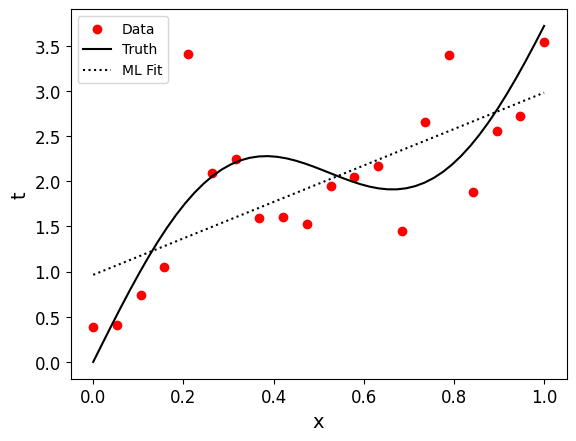

In [10]:
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Data")
plt.plot(xvals, y_true(xvals), color="black", label="Truth")
plt.plot(xvals, y_ML(xvals, wML), color="black", linestyle="dotted", label="ML Fit")
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

Of course, the eye test already tells us that the linear model is not performing greatly. However, we need to quantify this. We can define the Root Mean Squared Error of a model as

$$\text{RMSE}(t,y)=\sqrt{\frac{1}{N}(t_{n}-y_{n})^{2}}$$

which captures the average error of our model. This is only one among many possible metrics, which depend on what exactly we want to quantify. This one in particular is motivated by the Maximum Likelihood problem we are trying to solve.

In [11]:
def rmse(t, y):
    return np.sqrt(np.mean((t - y) ** 2))

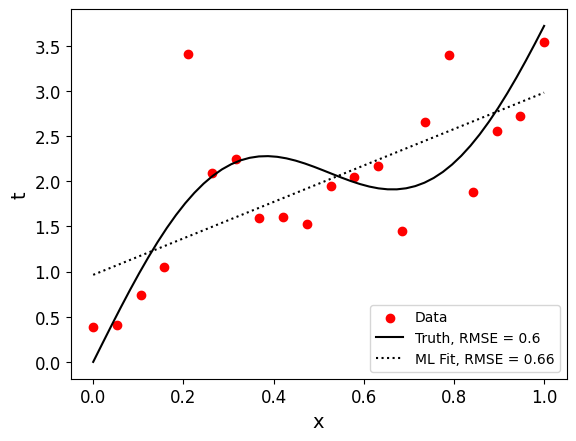

In [12]:
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Data")
plt.plot(
    xvals,
    y_true(xvals),
    color="black",
    label="Truth, RMSE = " + str(np.round(rmse(t, y_true(x)), 2)),
)
plt.plot(
    xvals,
    y_ML(xvals, wML),
    color="black",
    linestyle="dotted",
    label="ML Fit, RMSE = " + str(np.round(rmse(t, y_ML(x, wML)), 2)),
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

We can also plot the residuals to study the deviation from the expected value. For a good model, we expect residuals to be normally distributed around zero with hopefully a small variance.

Text(0.5, 1.0, 'Residuals')

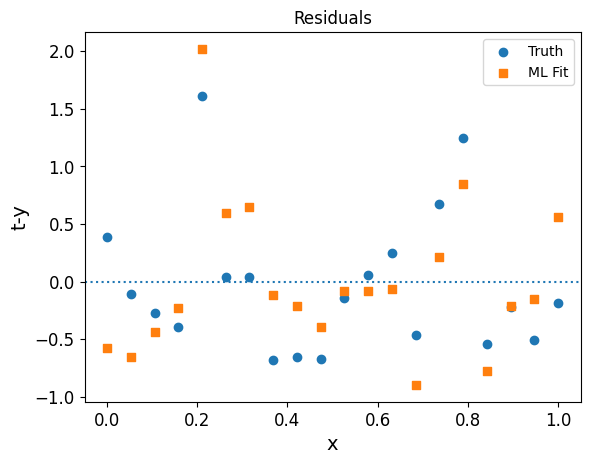

In [13]:
plt.scatter(x, t - y_true(x), marker="o", label="Truth")
plt.scatter(x, t - y_ML(x, wML), marker="s", label="ML Fit")
plt.axhline(0.0, linestyle="dotted")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("t-y")
plt.title("Residuals")

### Exercise

Repeat the previous analysis with a more general linear model:

$$y(x_{i},w)=w_{0}+\sum_{d=1}^{5}w_{d}x^{d}_{i}$$

In [14]:
###SOLUTION_START

In [15]:
Phi = np.vstack(
    [np.ones(len(x)), x[:, 0], x[:, 0] ** 2, x[:, 0] ** 3, x[:, 0] ** 4, x[:, 0] ** 5]
).T  # [1.0 x x2 x3 x4 x5]

In [16]:
Phi.shape

(20, 6)

In [17]:
print(x[0], Phi[0])

[0.] [1. 0. 0. 0. 0. 0.]


In [18]:
Phi = np.asarray([x[:, 0] ** m for m in range(6)]).T

In [19]:
Phi.shape

(20, 6)

In [20]:
A = np.dot(Phi.T, Phi)
b = np.dot(Phi.T, t)
wML = np.linalg.solve(A, b)

In [21]:
wML

array([[-1.00704996e-02],
       [ 1.73382327e+01],
       [-5.16967333e+01],
       [ 6.17798544e+01],
       [-2.54233781e+01],
       [ 1.24851317e+00]])

In [22]:
def y_ML(x, wML):
    return (
        wML[0] * (x**0)
        + wML[1] * x
        + wML[2] * (x**2)
        + wML[3] * (x**3)
        + wML[4] * (x**4)
        + wML[5] * (x**5)
    )

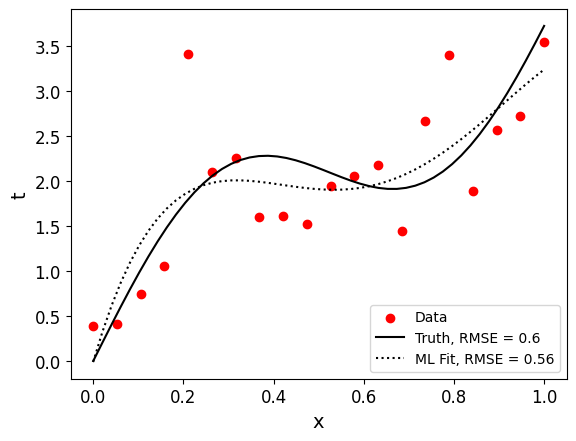

In [23]:
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Data")
plt.plot(
    xvals,
    y_true(xvals),
    color="black",
    label="Truth, RMSE = " + str(np.round(rmse(t, y_true(x)), 2)),
)
plt.plot(
    xvals,
    y_ML(xvals, wML),
    color="black",
    linestyle="dotted",
    label="ML Fit, RMSE = " + str(np.round(rmse(t, y_ML(x, wML)), 2)),
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [24]:
###SOLUTION_STOP

### Model evaluation, under and overfitting

We have trained two models and evaluated the performance. However, this evaluation is fundamentally flawed. Why? Because we have evaluated on the same data used to train the model. This is particularly dangerous when we risk overfitting the problem.

To illustrate this, let's create a new dataset

In [25]:
N_SAMPLES = 10
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2 * np.pi * x) + np.random.randn(N_SAMPLES, 1) * 0.3

In [26]:
def y_true(x):
    return np.sin(2 * np.pi * x)

As a rule of thumb, one should always evaluate on data **unseen during training**. We can call this the test data. For us, it's free to generate more data but otherwise we need to split the data before training.

In [27]:
N_SAMPLES_TEST = 10
x_test = np.random.rand(N_SAMPLES_TEST, 1)
t_test = np.sin(2 * np.pi * x_test) + 0.3 * np.random.randn(N_SAMPLES_TEST, 1)

Under and overfitting is a function of the model. For our simplified polynomial linear models, we can explore model space by changing the polynomial degree. To do this, let's define a simple class that trains and evaluates a model for a given degree

In [28]:
class LinearModelDegree:
    def __init__(self, degree):
        self.degree = degree
        self.wML = np.zeros(degree + 1)

    def fit(self, x, t):
        Phi = np.array([x[:, 0] ** i for i in range(self.degree + 1)]).T
        A = np.dot(Phi.T, Phi)
        b = np.dot(Phi.T, t)
        self.wML = np.linalg.solve(A, b)
        return self

    def y_ML(self, x):
        Phi = np.array([x[:, 0] ** i for i in range(self.degree + 1)]).T
        return np.dot(Phi, self.wML)

    def Phi(self, x):
        Phi = np.array([x[:, 0] ** i for i in range(self.degree + 1)]).T
        return Phi

Let's see how this looks for a few possible choices

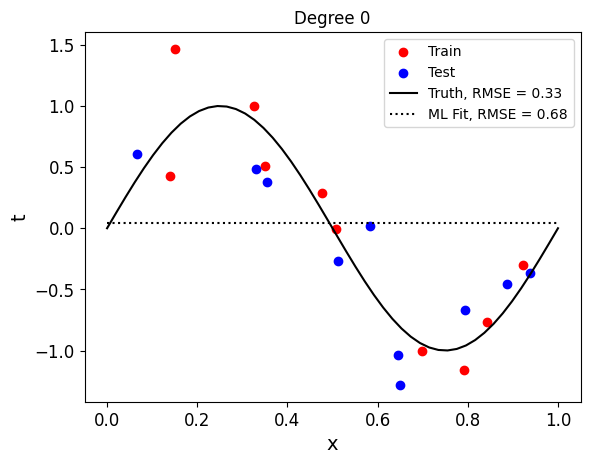

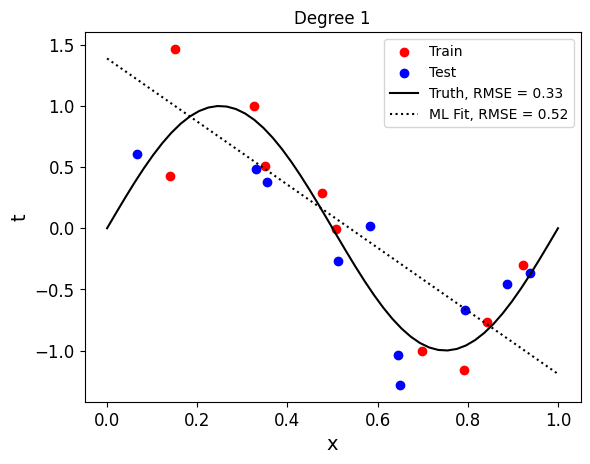

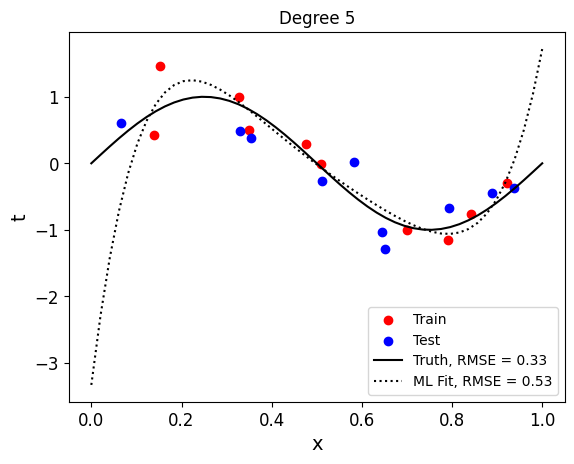

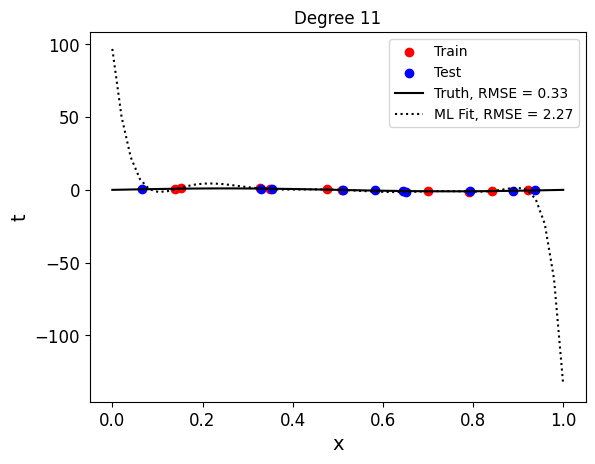

In [29]:
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
for degree in [0, 1, 5, 11]:  # range(6):
    plt.scatter(x, t, c="red", label="Train")
    plt.scatter(x_test, t_test, c="blue", label="Test")
    model = LinearModelDegree(degree)
    model.fit(x, t)
    plt.plot(
        xvals,
        y_true(xvals),
        color="black",
        label="Truth, RMSE = " + str(np.round(rmse(t_test, y_true(x_test)), 2)),
    )
    plt.plot(
        xvals,
        model.y_ML(xvals),
        color="black",
        linestyle="dotted",
        label="ML Fit, RMSE = " + str(np.round(rmse(t_test, model.y_ML(x_test)), 2)),
    )
    plt.legend()
    plt.xlabel("x")
    plt.ylabel("t")
    plt.title("Degree %i" % degree)
    plt.show()

It's very clear that low degrees do not adjust the data particularly well (underfitting) while high degrees adjust the training data too well and generalize poorly (overfitting).

To quantify this, we again compute the RMSE metric over unseen data for each model. We can plot this and select the best polynomial degree.

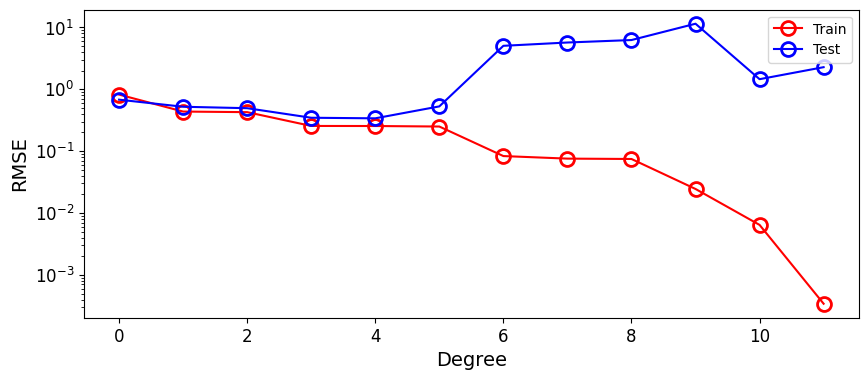

In [30]:
max_degree = 11
rmse_vals = np.zeros(max_degree + 1)
rmse_vals_test = np.zeros(max_degree + 1)
for ndegree, degree in enumerate(range(max_degree + 1)):
    model = LinearModelDegree(degree)
    model.fit(x, t)
    rmse_vals[ndegree] = rmse(t, model.y_ML(x))
    rmse_vals_test[ndegree] = rmse(t_test, model.y_ML(x_test))

plt.figure(figsize=(10, 4))
plt.plot(
    range(max_degree + 1), rmse_vals, "o-r", mfc="None", ms=10, mew=2, label="Train"
)
plt.plot(
    range(max_degree + 1), rmse_vals_test, "o-b", mfc="None", ms=10, mew=2, label="Test"
)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(loc="upper right")

We see how the two losses start to diverge for a degree of 3/4. The particularly values of the metrics are not (too) important, the important thing is that their behaviours diverge as I increase the degree.

### Validation and cross-validation

In the previous section we simply evaluated on unseen data. However, if we use the data to select a model, we are effectively training on it and risk overfitting it as well. To avoid this, test data is usually left to the very end to evaluate model performance after all model selections and training have taken place (of course, this may never happen exactly in practice but one should aspire to it).

To perform model selection, one usually splits the training dataset into two, where one subset is used to train models and the other, called validation set, is used to evaluate models and perform model selection.

In [31]:
x_train, x_val = x[:8], x[8:]
t_train, t_val = t[:8], t[8:]

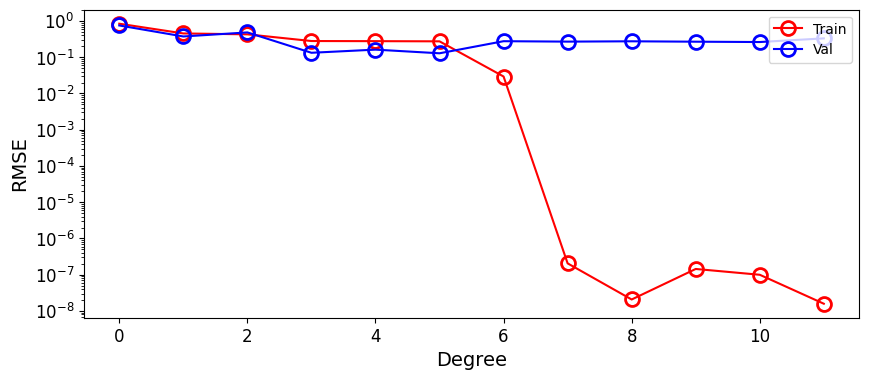

In [32]:
max_degree = 11
rmse_vals = np.zeros(max_degree + 1)
rmse_vals_val = np.zeros(max_degree + 1)
for ndegree, degree in enumerate(range(max_degree + 1)):
    model = LinearModelDegree(degree)
    model.fit(x_train, t_train)
    rmse_vals[ndegree] = rmse(t_train, model.y_ML(x_train))
    rmse_vals_val[ndegree] = rmse(t_val, model.y_ML(x_val))

plt.figure(figsize=(10, 4))
plt.plot(
    range(max_degree + 1), rmse_vals, "o-r", mfc="None", ms=10, mew=2, label="Train"
)
plt.plot(
    range(max_degree + 1), rmse_vals_val, "o-b", mfc="None", ms=10, mew=2, label="Val"
)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(loc="upper right")

What happened here? Well, we're evaluating on two samples. Thus, splitting the data like this risks having too few datapoints to trust our metrics.

To avoid this, we introduce the concept of **cross-validation**.

In cross-validation, we split the data into $K$ subsets. We train the model $K$ times, where for each training we select one subset as the validation set and train our model over the remaining $K-1$ datasets. Then, we can average our $K$ metrics to obtain the average validation metric.

The particular case where $K=N$ corresponds to leave-one-out-cross-validation (LOO-CV). Usually, increasing $K$ increases training costs so LOO-CV is not so common. Also, it may induce some unwanted variance as well.

For our model with so few datapoints, cost is not an issue so let's due LOO-CV.

In [33]:
np.vstack([x[:1], x[2:]]).shape

(9, 1)

In [34]:
rmse_vals_val_kfold = np.zeros((N_SAMPLES, max_degree + 1))
for nsample in range(N_SAMPLES):
    for ndegree, degree in enumerate(range(max_degree + 1)):
        x_train, t_train = np.vstack([x[:nsample], x[nsample + 1 :]]), np.vstack(
            [t[:nsample], t[nsample + 1 :]]
        )
        # print(x_train.shape,t_train.shape)
        x_val, t_val = x[nsample].reshape(-1, 1), t[nsample].reshape(-1, 1)
        model = LinearModelDegree(degree)
        model.fit(x_train, t_train)
        rmse_vals_val_kfold[nsample, ndegree] = rmse(t_val, model.y_ML(x_val))

In [35]:
np.mean(rmse_vals_val_kfold, 0)

array([ 0.76991316,  0.46811772,  0.56360674,  0.32078647,  0.38489656,
        0.93642512,  0.26806846,  0.54265877,  7.0761658 ,  8.6539918 ,
       10.04888757,  3.10128137])

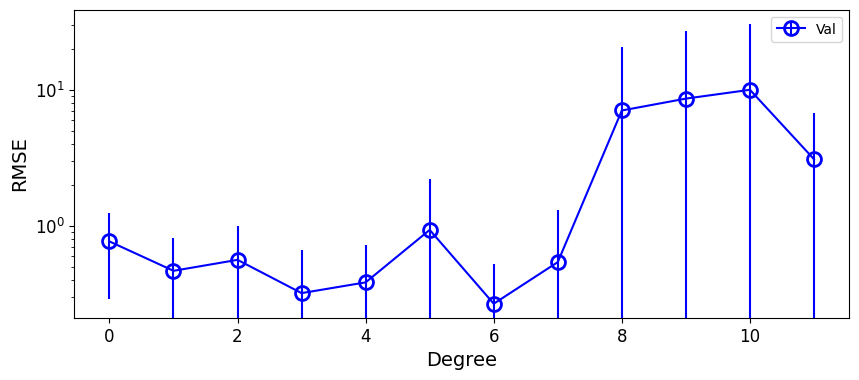

In [36]:
plt.figure(figsize=(10, 4))
plt.errorbar(
    x=range(max_degree + 1),
    y=np.mean(rmse_vals_val_kfold, 0),
    yerr=np.std(rmse_vals_val_kfold, 0),
    fmt="o-b",
    mfc="None",
    ms=10,
    mew=2,
    label="Val",
)
plt.xlabel("Degree")
plt.ylabel("RMSE")
plt.yscale("log")
plt.legend(loc="upper right")

Now we can choose the best model as the one that minimizes the average RMSE.

In [37]:
best_degree = np.argmin(np.mean(rmse_vals_val_kfold, 0))
best_model = LinearModelDegree(int(best_degree))
best_model.fit(x, t)
print(best_degree, best_model.wML)

6 [[   -53.97467231]
 [   858.94065379]
 [ -4930.86698047]
 [ 13805.29594058]
 [-20326.29122559]
 [ 15091.67096909]
 [ -4449.70533141]]


### `sklearn`

In practice, one might prefer to use standard libraries instead of home-made code.

A very popular choice is `scikit-learn` which contains a lot of useful regressors. The particular case we used here is accessible through `sklearn.LinearRegression`. To build a particular polynomial model, we can use the `sklearn.preprocessing.Pipeline` class (in particular, `PolynomialFeatures`).

Cross-validation errors can be computed easily for a fixed model using `sklearn.model_evaluation.cross_val_score`.

To explore model space, `scikit-learn` offers two methods called `GridSearchCV`, `RandomizedSearchCV`. The first explores parameters over a grid, the second using random sampling.

#### Exercise:

Re-do all the examples using `scikit-learn`.

In [38]:
###SOLUTION_START

from sklearn.linear_model import LinearRegression

Let's see what we can do:

In [39]:
# see docs
# LinearRegression??

Be careful with `fit_intercept`! As a default it's set to true.

In [40]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x, t)  # features, target

LinearRegression()

We can get the intercept and coefficients

In [41]:
print(lr.intercept_, lr.coef_)

[1.38845455] [[-2.58000819]]


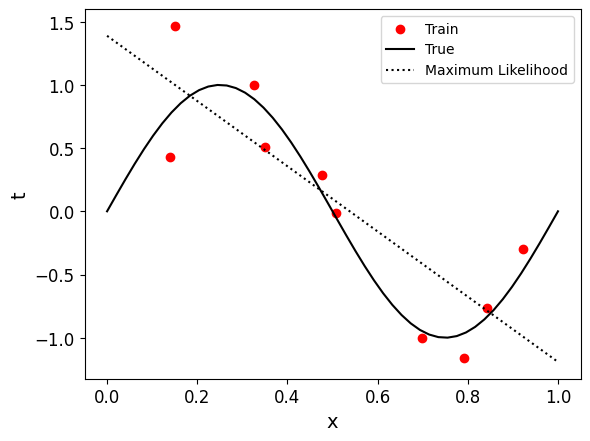

In [42]:
lr.predict(np.asarray([0.2]).reshape(1, -1))
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Train")
plt.plot(xvals, y_true(xvals), color="black", label="True")
plt.plot(
    xvals,
    lr.predict(xvals),
    color="black",
    linestyle="dotted",
    label="Maximum Likelihood",
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

I can also load the proper metrics from `sklearn.metrics`

In [43]:
from sklearn.metrics import mean_squared_error as mse

np.sqrt(mse(t, lr.predict(x)))

0.4346968928016543

$w_{0}$ is by default the intercept. This can be confusing if I use a design matrix $\Phi$

In [44]:
Phi = np.vstack([np.ones(len(x)), x[:, 0]]).T
lr = LinearRegression(fit_intercept=True)
lr.fit(Phi, t)  # features, target
print(lr.intercept_, lr.coef_)
lr = LinearRegression(fit_intercept=False)
lr.fit(Phi, t)  # features, target
print(lr.intercept_, lr.coef_)

[1.38845455] [[ 0.         -2.58000819]]
0.0 [[ 1.38845455 -2.58000819]]


Be careful with this!

Now let's see how I can do polynomial features very conveniently:

In [45]:
from sklearn.preprocessing import PolynomialFeatures

print(PolynomialFeatures(degree=1).fit_transform(x))

print(PolynomialFeatures(degree=1, include_bias=False).fit_transform(x))

[[1.         0.34914391]
 [1.         0.69906969]
 [1.         0.15171151]
 [1.         0.79181938]
 [1.         0.47619945]
 [1.         0.13964354]
 [1.         0.84219601]
 [1.         0.92140356]
 [1.         0.32651827]
 [1.         0.50834625]]
[[0.34914391]
 [0.69906969]
 [0.15171151]
 [0.79181938]
 [0.47619945]
 [0.13964354]
 [0.84219601]
 [0.92140356]
 [0.32651827]
 [0.50834625]]


We have two choices: `PolynomialFeatures` with `include_bias=True` and `LinearRegression` with `fit_intercept=False` or the opposite.

We can combine these classes with `Pipeline`

[[ -0.51256466  15.54062569 -43.88621641  29.60283875]]
0.0


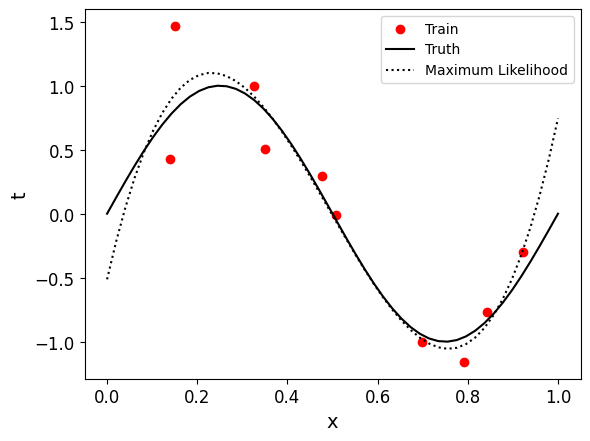

0.25454495682049133


In [46]:
from sklearn.pipeline import Pipeline

degree = 3
model = Pipeline(
    [
        ["poly", PolynomialFeatures(degree=degree, include_bias=True)],
        ["regressor", LinearRegression(fit_intercept=False)],
    ]
)
model.fit(x, t)
model.predict(np.asarray([[0.2]]))
# Let's see the coefficients
print(model["regressor"].coef_)
# And verify that there is no intercept
print(model["regressor"].intercept_)
xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x, t, c="red", label="Train")
plt.plot(xvals, y_true(xvals), color="black", label="Truth")
plt.plot(
    xvals,
    model.predict(xvals),
    color="black",
    linestyle="dotted",
    label="Maximum Likelihood",
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

print(np.sqrt(mse(t, model.predict(x))))

Now we can look into cross-validation

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score

In [48]:
lr = LinearRegression(fit_intercept=True)
loo_cv = cross_val_score(
    lr, x_train, t_train, cv=x_train.shape[0], scoring="neg_root_mean_squared_error"
)
errors = -loo_cv
print(errors.mean(), errors.std())

0.5129486513366724 0.35387856115784505


Now we can decide the best Polynomial degree

In [ ]:
def cv_multimodel(degrees=range(12), cv=len(x_train), plot=True):
    rsmes = np.zeros(len(degrees))
    std_rsmes = np.zeros(len(degrees))

    for i, degree in enumerate(degrees):
        model = Pipeline(
            [
                (
                    "features",
                    PolynomialFeatures(degree=degree),
                ),  # x->[1,x,x^2,..,x^degree]
                ("regression", LinearRegression(fit_intercept=False)),
            ]
        )
        # If I wanted predictions, I would use:
        # y_pred = cross_val_predict(model, x, t, cv=cv)
        # Do K-folding
        scores = cross_val_score(
            model, x, t, cv=cv, scoring="neg_root_mean_squared_error"
        )

        # Change sign to get positive RMSE
        rsmes[i] = (-scores).mean()
        std_rsmes[i] = (-scores).std()

    if plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)

        # No errors
        # ax.semilogy(grados, rsmes, 'o-', mfc='None')

        # With errors
        ax.errorbar(degrees, rsmes, std_rsmes, fmt="-o")
        ax.set_yscale("log")

        ax.set_xlabel("Degree")
        ax.set_ylabel("mean RMSE")

    return degrees, rsmes, std_rsmes

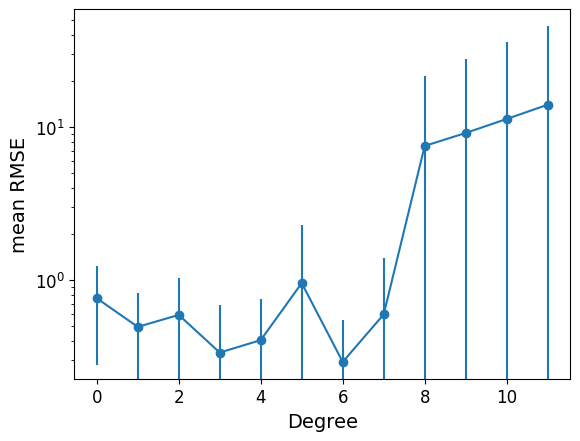

In [50]:
degrees, errors, errorst = cv_multimodel()

In [51]:
print("The best degree is: {}".format(degrees[np.argmin(errors)]))

The best degree is: 6


`sklearn` allows us to do this automatically (including re-fitting the best model over all training data) through `GridSearchCV`

In [52]:
from sklearn.model_selection import GridSearchCV

# show docs
# GridSearchCV?

In [53]:
model = Pipeline(
    [
        ("features", PolynomialFeatures()),
        ("regression", LinearRegression(fit_intercept=False)),
    ]
)
hyperparameters = {"features__degree": np.arange(1, 12)}
grid = GridSearchCV(
    model,
    hyperparameters,
    refit=True,
    cv=len(x_train),
    scoring="neg_mean_squared_error",
)
grid.fit(x, t)

GridSearchCV(cv=9,
             estimator=Pipeline(steps=[('features', PolynomialFeatures()),
                                       ('regression',
                                        LinearRegression(fit_intercept=False))]),
             param_grid={'features__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])},
             scoring='neg_mean_squared_error')

In [54]:
print(grid.best_params_)

{'features__degree': 6}


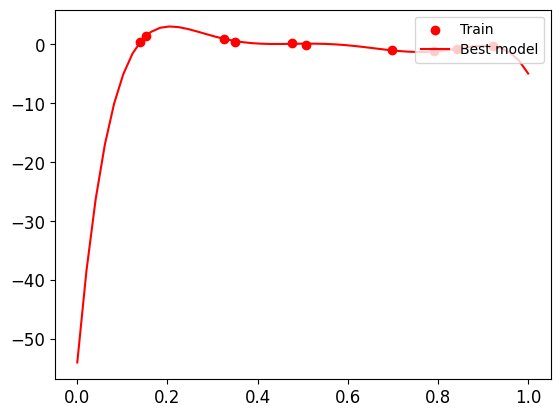

In [55]:
best_model = grid.best_estimator_
plt.scatter(x, t, c="red", label="Train")
plt.plot(xvals, best_model.predict(xvals), color="red", label="Best model")
plt.legend(loc="upper right")

In [56]:
grid.cv_results_

{'mean_fit_time': array([0.00055549, 0.00041419, 0.00038849, 0.00042709, 0.00038107,
        0.00051416, 0.00069655, 0.00048765, 0.00061745, 0.00038287,
        0.00038701]),
 'std_fit_time': array([6.81549574e-05, 4.10031866e-05, 2.74360090e-05, 5.75770859e-05,
        1.55145190e-05, 1.60060238e-04, 6.79849426e-05, 8.74669499e-05,
        2.10313411e-04, 1.51871967e-05, 1.62357345e-05]),
 'mean_score_time': array([0.00030865, 0.00024833, 0.00022297, 0.00024811, 0.00022356,
        0.00029529, 0.00039691, 0.0003158 , 0.00032065, 0.0002269 ,
        0.0002248 ]),
 'std_score_time': array([1.91627213e-05, 3.02153913e-05, 1.30154990e-05, 3.20333794e-05,
        7.71419105e-06, 1.00882406e-04, 4.34126674e-05, 6.72370557e-05,
        5.47339508e-05, 1.11703903e-05, 5.81885109e-06]),
 'param_features__degree': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False],
        fi

In [57]:
grid.cv_results_["param_features__degree"].data

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype=object)

1 0.3522035662393071
2 0.5435094146816882
3 0.2347751654831424
4 0.28205983514819494
5 2.7232247312675337
6 0.15157515596094895
7 0.9931353378855695
8 255.0967342293449
9 434.1239752552224
10 728.8483471136822
11 1196.7006354238536


Text(0, 0.5, 'RMSE on validation set')

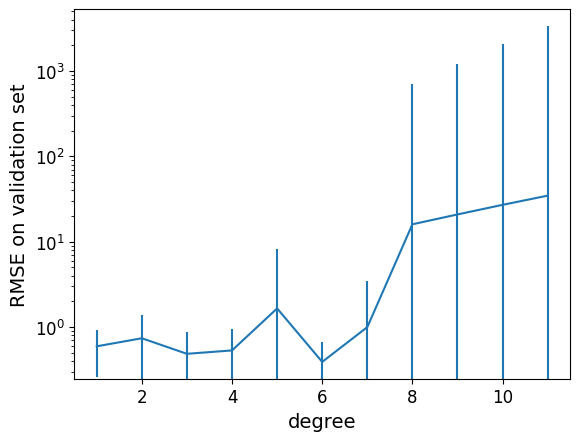

In [58]:
for ni, i in enumerate(grid.cv_results_["params"]):
    print(i["features__degree"], -grid.cv_results_["mean_test_score"][ni])
plt.errorbar(
    grid.cv_results_["param_features__degree"].data,
    np.sqrt(-grid.cv_results_["mean_test_score"]),
    yerr=grid.cv_results_["std_test_score"],
)
plt.yscale("log")
plt.xlabel("degree")
plt.ylabel("RMSE on validation set")

###SOLUTION_STOP

### Bayesian Linear Regression

In the previous sections, we followed the standard protocol:

- For each measurement $n=1,...,N$, we collect a dependent target $t_{n}$ and $D$ independet features grouped as $x_{n}$.
- We model our problem using a linear model $y=\sum_{i=0}^{M}w_{j}\phi_{j}(\vec{x})=\vec{w}^{T}\vec{\phi}$, and assume a likelihood $$p(t|\vec{x},\vec{w},\beta)=\mathcal{N}(y(\vec{w},\vec{x}),\beta^{-1})$$ (where $\beta$ has been used instead of $\sigma$ for future convenience).
- We obtain the MLE estimator $\vec{w}_{\mathrm{MLE}}$ by solving the normal equations

$$
\vec{w}_\mathrm{MLE} = (\Phi^{T}\cdot\Phi)^{-1}\cdot\Phi^{T}\cdot t
$$
and we can obtain the MLE estimator for the precision $\beta$
$$
\frac{1}{\beta_{\mathrm{MLE}}} = \frac{1}{N}\sum_{n=1}^N\left\{y(x_n, \vec{w}_{\mathrm{MLE}}) - t_n\right\}^2\;\;,
$$

This approach, although successful, can be extended to estimate uncertainties on the estimators. This can be done in a frequentist way or in a Bayesian way. In this notebook we explore the latter.

#### Bayesian model

In Bayesian inference, we aim to obtain a posterior distribution over the parameters $\vec{w}$ given the measurements $\vec{x},\vec{t}$ and a particular likelihood function. To do so, we use Bayes theorem which states that the posterior distribution is

$$p(\vec{w},\beta|\vec{x},\vec{t})=\frac{p(t|\vec{x},\vec{w},\beta)p(\vec{w})p(\beta)}{p(t|\vec{x})}$$

where $p(\vec{w})$ and $p(\beta)$ are the prior distributions over $\vec{w}$ and $\beta$ and $p(t|\vec{x})$ is the marginal likelihood or evidence of the model which integrates over all possible parameter values

$$p(t|\vec{x})=\int d\vec{w}d\beta\,p(t|\vec{x},\vec{w},\beta)p(\vec{w})p(\beta)$$

In this notebook, we'll explore Bayesian techniques of increasing complexity

- Estimate the Maximum A Posterior (MAP) values of the parameters. This is equivalent to solving a MLE problem with regularization, where the regularization arises from the prior.
- Obtain the full posterior which encodes the uncertainties over the obtained parameters.

We then show how to use either the MAP or the full posterior to predict new values $t'$ for a given new independent measurement $x'$.

Before solving the problem, we need to specifiy the prior.

Prior specification is perhaps more an art than a science. There are particular choices which are preferred, either because they render posterior estimation easier (which is the case for conjugate priors of exponential likelihoods, as we'll detail here) or because they are preferred from some information theoretic perspective (Jeffreys's prior). In general, one should wish for small to no dependence on the prior. However, priors do encode previous knowledge and regularization of the problem and thus shouldn't be simply dismissed as an inconvenience of Bayesian methods.


In the following, we'll assume $\beta$ is known and fixed, and focus on $\vec{w}$.


**Prior for $\vec{w}$**

For a known $\beta$, the only random variables are the coefficients $\vec{w}$. Let's assume a parametric prior

$$p(\vec{w}|\gamma)$$

where $\gamma$ are the prior parameters (referred to as model  **hyperparameters**).

For a Gaussian likelihood, a convenient choice is its conjugated prior: another gaussian.

$$p(\vec{w}|\gamma)=\mathcal{N}(\vec{w}|0,\gamma^{-1}\mathbf{I}_{(M+1)\mathrm{x}(M+1)})$$

where $\gamma$ is a single number that controls the precision of all coefficients (this can be extended to a per parameter precision if necessary).

For $M+1$ parameters (including the bias $w_{0}$):

$$p(\vec{w}|\gamma)=\left(\frac{\gamma}{2\pi}\right)^{(M+1)/2} \exp{\left\{-\frac{\gamma}{2}\vec{w}^T\vec{w}\right\}}$$

**Maximum a Posterior (MAP)**

To find the posterior distribution, we can employ Bayes' theorem:

$$
p(\vec{w} | t, \beta, \gamma) = \frac{p(t | \vec{w}, \beta, \gamma)\,p(\vec{w} | \gamma)}{p(t | \beta, \gamma)}\;\;,
$$

where $x$ is implicit.

The usual problem with posterior estimation is the denominator, the evidence, which is usually not analytically tractable. For low dimensional and simple parameter spaces, this integral can be computed through simple grid integration and the posterior can be estimated at each point in parameter space. For more complicated problems, Markov Chain Monte Carlo or Nested sampling need to be implemented.

Before tackling such issues, let's estimate the Maximum A Posteriori or MAP. The prior acts a regularization, much like LASSO or Ridge methods.

The use of a conjugate prior allows us to obtain the MAP as a modified version of the normal equations. To see this, let's look at the log-posterior


$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = \text{Ln }p(t|\vec{w},\beta,\gamma) + \text{Ln }p(\vec{w}|\gamma) +\text{ cte} $$

$$\text{Ln }p(\vec{w}|t,\beta,\gamma) = -\frac{\beta}{2}\sum_{n=1}^N \left\{t_n - \vec{w}^{T}\vec{\phi}(x_n)\right\}^2 - \frac{\gamma}{2}\vec{w}^{T}\vec{w} +\text{ C} $$

A trained eye can realize that this is the same function one maximizes when performing RIDGE regression by identifying $\frac{\gamma}{\beta}=\lambda$

The MAP is found to be

$$
\vec{w}_\mathrm{MAP} = \left(\frac{\gamma}{\beta}\mathrm{\mathbf{I}} + \Phi^{T} \cdot\Phi\right)^{-1}\cdot \Phi^{T}\cdot t
$$

with $\frac{\gamma}{\beta}$ controlling the relative weight between prior and likelihood with $\gamma \rightarrow 0$ yielding $\vec{w}_{MAP}\rightarrow\vec{w}_{\mathrm{MLE}}$. This is nothing more than the case of a uniform, non-informative prior.

Other prior choices yield LASSO regression and others (see eq. 3.56 in [Bishop](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf)).

In [59]:
beta = 1 / 0.3
gamma = 1e-2 / 0.3  # gamma/beta = lambda
M = 8

model = LinearModelDegree(M)

Phi_train = model.Phi(x_train)
Phi_test = model.Phi(x_test)

Exercise:

Solve the normal equations

[[ 1.16708432]
 [-0.52031603]
 [-2.46171519]
 [-1.99174141]
 [-0.78856103]
 [ 0.3610197 ]
 [ 1.23865856]
 [ 1.83502621]
 [ 2.20023104]]


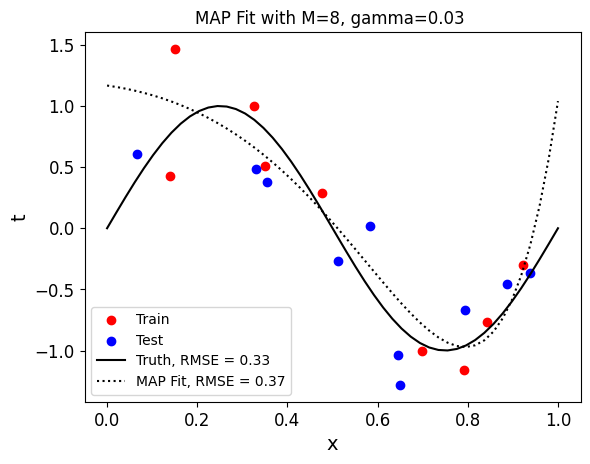

In [60]:
###SOLUTION_START

A = np.dot(Phi_train.T, Phi_train) + gamma / beta * np.eye(M + 1)
b = np.dot(Phi_train.T, t_train)
wMAP = np.linalg.solve(A, b)
print(wMAP)


def y_MAP(x, wMAP):
    return np.dot(model.Phi(x), wMAP)


xvals = np.linspace(0, 1, num=50).reshape(-1, 1)
plt.scatter(x_train, t_train, c="red", label="Train")
plt.scatter(x_test, t_test, c="blue", label="Test")
plt.plot(
    xvals,
    y_true(xvals),
    color="black",
    label="Truth, RMSE = " + str(np.round(rmse(t_test, y_true(x_test)), 2)),
)
plt.plot(
    xvals,
    y_MAP(xvals, wMAP),
    color="black",
    linestyle="dotted",
    label="MAP Fit, RMSE = " + str(np.round(rmse(t_test, y_MAP(x_test, wMAP)), 2)),
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.title("MAP Fit with M=%i, gamma=%.2f " % (M, gamma))
plt.show()
###SOLUTION_STOP

#### Posterior distribution

Now let's tackle the posterior.

Again, conjugate priors are very useful. For conjugate priors, one can see that the posterior takes the same parametric form as the prior with modified parameters:

$$p(\vec{w}|t,\gamma,\beta)=\mathcal{N}(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$$

with

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \beta\;\mathbf{S}_N \cdot \Phi^{T}\cdot t\\
\mathbf{S}^{-1}_N &=& \gamma\;\mathbf{I} + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

A nice consistency test is that replacing $\mathbf{S}_N$ in the expression for $\vec{\mu}_{N}$ we recover the normal equations for $\vec{w}_\mathrm{MAP}$. This is a consequence of having a symmetric gaussian distribution and thus the MAP is also the posterior mean.

We can consider a more general, but still gaussian prior

$$
p(\vec{w} | \vec{\mu}_0, \mathbf{S}_0) = \mathcal{N}(\vec{w} | \vec{\mu}_0, \mathbf{S}_0)\;\;,
$$

where now the covariance matrix is arbitrary. This allows us to regularize different basis functions differently and also include correlations between coefficients.

In this case, the posterior distribution has parameters:

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{S}^{-1}_N &=& \mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\;\;.
\end{array}}
$$

This provides us a complete $\vec{w}^{T} = (w_0, \ldots, w_M)$ PDF.

#### Exercise: Fitting a noisy line with Bayesian regression

Let's do the simplest thing: fit the parameters $a_{0}$, $a_{1}$ of a straight line $f(x,\vec{a}) = a_0 + a_{1}x$ where $x$ lies in $[-1,1)$.

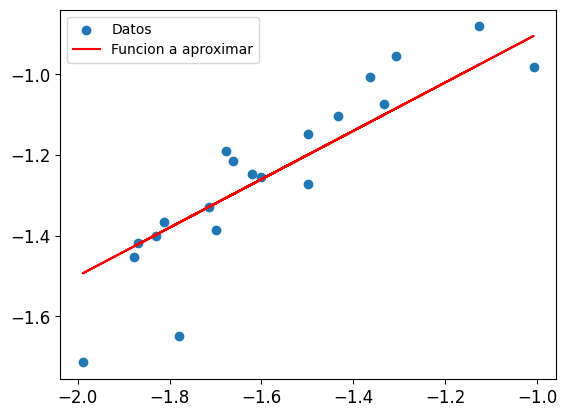

In [61]:
np.random.seed(60)
a0, a1 = -0.3, 0.6
var = 0.1
N = 20
x = -2.0 + np.random.rand(N)
f = a0 + a1 * x
t = a0 + a1 * x + var * np.random.randn(N)
plt.scatter(x, t, label="Datos")
plt.plot(x, f, color="red", label="Funcion a aproximar")
plt.legend(loc="upper left")

As a model, we simply have $y(x,w) = w_0 + w_1 x$ with a design matrix
$$\Phi = \begin{pmatrix}
\phi_0(x_1) & \phi_1(x_1)\\
\phi_0(x_2) & \phi_1(x_2)\\
\vdots & \vdots\\
\phi_0(x_N) & \phi_1(x_N)\\
\end{pmatrix}$$

In [62]:
model = LinearModelDegree(1)
Phi = model.Phi(x.reshape(-1, 1))
print(Phi.shape)
print(Phi[0])

(20, 2)
[ 1.         -1.69912667]


Let's compute the MLE

In [63]:
model.fit(x.reshape(-1, 1), t.reshape(-1, 1))
wML = model.wML[:, 0]
print(wML.shape)

(2,)


In [64]:
wML

array([-0.0453789 ,  0.76126673])

Now let's consider a gaussian prior $p(\vec{w}) = \mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$.

We can update our posterior iteratively. That is, for $n=1,...,N$:

$$p_{n}(\vec{w})=\frac{p(t_{n}|x_{n},\vec{w},\gamma, \beta)p_{n-1}(\vec{w}|\gamma,\beta,t_{1,...,n-1},x_{1,...,n-1})}{p(t_{n}|x_{n},\vec{w},\gamma, \beta,t_{1,...,n-1},x_{1,...,n-1})}$$

with $p_{0}(\vec{w})=\mathcal{N} (\vec{0},\gamma^{-1}{\bf 1})$. That is, the posterior for the $n-1$-th measurement is the prior for the $n$-th measurement.

With this iterative approach, do the following:

Compute the likelihood and the posterior after $1$, $2$, $3$ and all $100$ measurements have been performed. For each case plot


*   The prior as a function of ($w_0$,$w_1$)
*   The line in $(x,t)$ defined by the ($w_0$,$w_1$) that maximize the prior and the true line defined by ($a_0$,$a_1$).
*   The likelihood as a function of ($w_0$,$w_1$)
*   The posterior as a function of ($w_0$,$w_1$)

Estimate the posterior numerically by integrating over a 2d grid and compare with the analytical posterior formula>
$$
\vec{\mu}_N = \beta {\bf S}_N \Phi^T \vec{t}\\
{\bf S}_N^{-1} = \gamma {\bf 1} + \beta \Phi^T \Phi
$$
where $\beta= (1/\sigma)^2 = (1/0.2)^2 = 25$.

Tips: To select points, you can use slicing on $\vec{t}$ ( ``t[:N]``) and $\Phi$ (``Phi[:N,:]``).

(100, 50)


/tmp/ipykernel_17083/1766395536.py:71: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


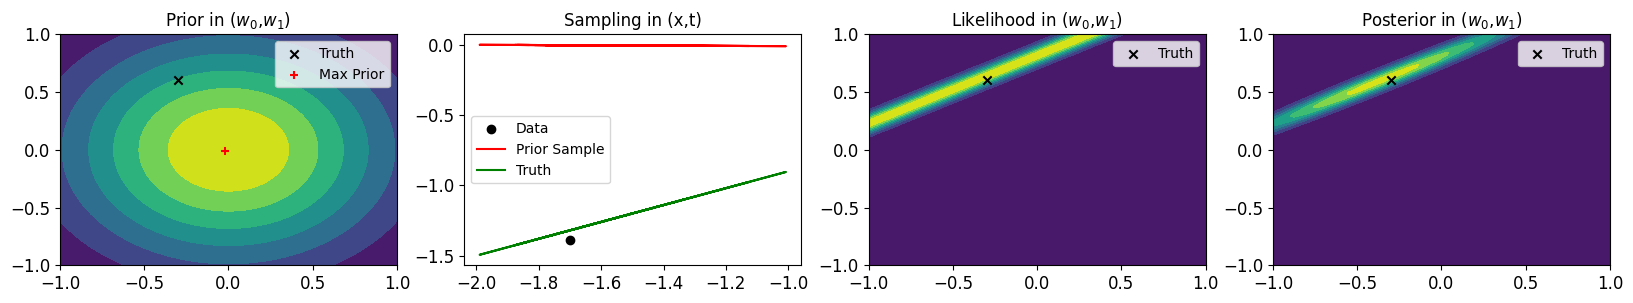

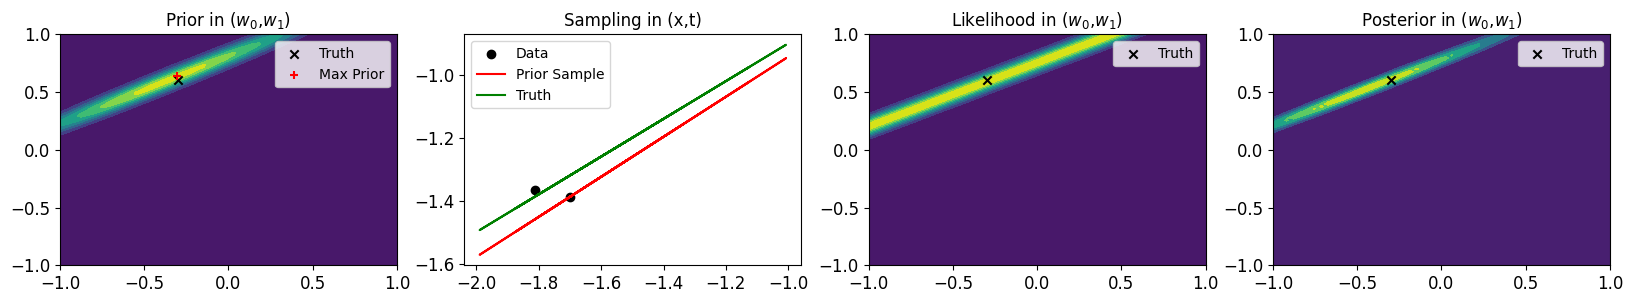

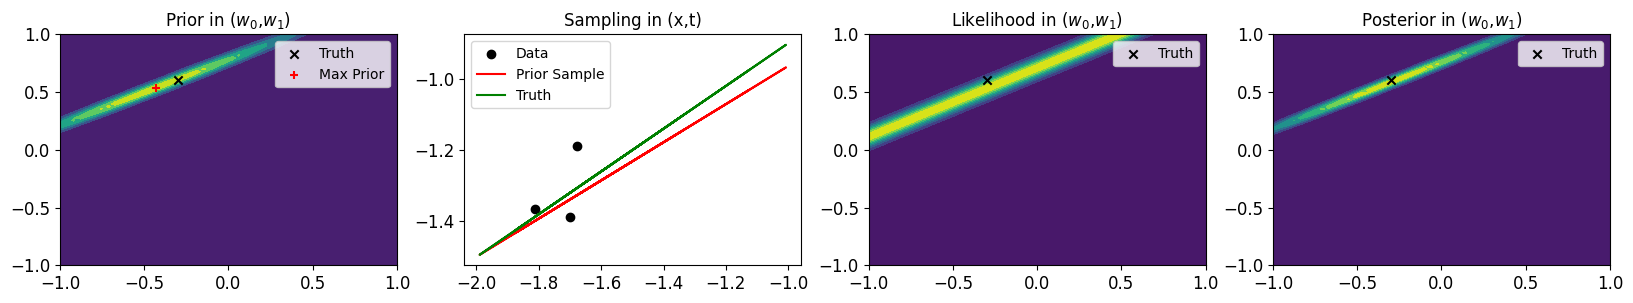

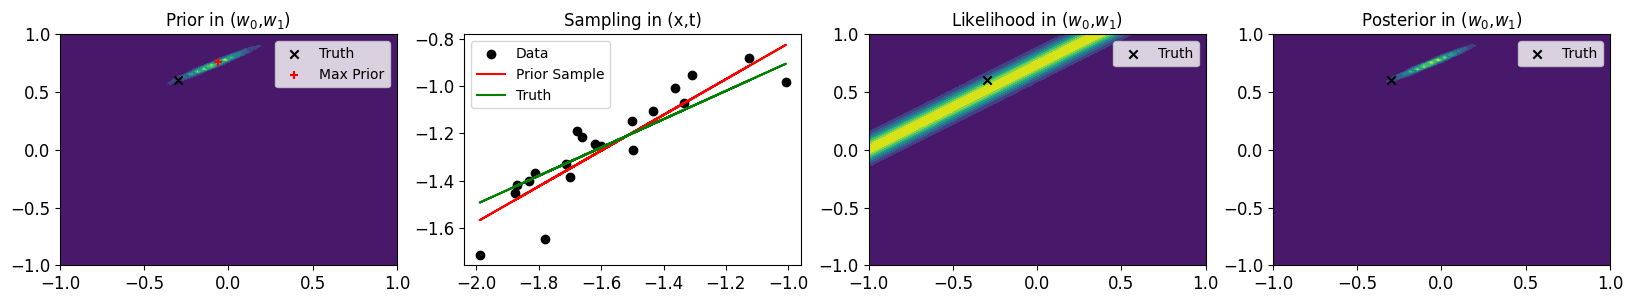

In [65]:
###SOLUTION_START


from scipy.stats import norm, multivariate_normal

gamma = 0.5
# possible values
w0_values = np.linspace(-1.0, 1.0, 50)
w1_values = np.linspace(-1.0, 1.0, 100)
# plot utils
W0, W1 = np.meshgrid(w0_values, w1_values)
pos = np.dstack((W0, W1))
# empty lists to store prior, likelihood and posterior
prior = []
likelihood = []
posterior = []

# initial prior:
prior.append(multivariate_normal(mean=[0.0, 0.0], cov=gamma * np.eye(2)).pdf(pos))

print(prior[0].shape)

for i in range(len(x)):  # data loop
    likelihood.append(
        norm(loc=W0 + W1 * x[i], scale=var).pdf(t[i])
    )  # likelihood for the data point i
    evidence = (
        np.sum(likelihood[-1] * prior[-1])
        * (w1_values[1] - w1_values[0])
        * (w0_values[1] - w0_values[0])
    )  # numerical iterative evidence for the data point i
    posterior.append(
        likelihood[-1] * prior[-1] / evidence
    )  # normalized iterative posterior for the data point i

    # sampleo puntos de (w0,w1) maximos para prior. Utilicen np.where(a==np.max(a)) para encontrar los indices donde esta el maximo. Si hay varios maximos, quedense con el primero.

    prior_sample = [
        W0[np.where(prior[-1] == np.max(prior[-1]))][0],
        W1[np.where(prior[-1] == np.max(prior[-1]))][0],
    ]

    # plots

    if i == 0 or i == 1 or i == 2 or i == len(x) - 1:
        fig, axes = plt.subplots(1, 4, figsize=(20, 3))
        axes[0].contourf(W0, W1, prior[-1])
        axes[0].scatter(a0, a1, marker="x", color="black", label="Truth")
        axes[0].scatter(
            prior_sample[0], prior_sample[1], marker="+", color="red", label="Max Prior"
        )
        axes[0].set_title("Prior in ($w_0$,$w_1$)")
        axes[1].scatter(x[: i + 1], t[: i + 1], color="black", label="Data")
        axes[1].plot(
            x, prior_sample[0] + prior_sample[1] * x, color="red", label="Prior Sample"
        )
        axes[1].plot(x, a0 + a1 * x, color="green", label="Truth")
        axes[1].set_title("Sampling in (x,t)")
        axes[2].contourf(W0, W1, likelihood[-1])
        axes[2].scatter(a0, a1, marker="x", color="black", label="Truth")
        axes[2].set_title("Likelihood in ($w_0$,$w_1$)")
        axes[3].contourf(W0, W1, posterior[-1])
        axes[3].scatter(a0, a1, marker="x", color="black", label="Truth")
        axes[3].set_title("Posterior in ($w_0$,$w_1$)")

        axes[0].legend(loc="best")
        axes[1].legend(loc="best")
        axes[2].legend(loc="best")
        axes[3].legend(loc="best")

        fig.show()

    # update prior for the next iteration
    prior.append(posterior[-1])

In [66]:
###SOLUTION_STOP

#### Posterior predictive

The posterior predictive is the probability of a new $t'$ for a given measurement $x'$ given all previous $(X,T)$ pairs:

$$p(t'|x',X,T,\beta,\gamma)$$

With the assumed prior above, this PDF is:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t', \vec{w}|x',X,T,\beta,\gamma)$$

Using basic probability rules and the fact that the measurements are independent for given $\vec{w}$, we have:

$$p(t'|x',X,T,\gamma)=\int d\vec{w}p(t'|\vec{w},x',\beta)p(\vec{w}|X,T,\beta,\gamma)$$

Now it depends on the estimated posterior! It is the expectation value of the likelihood under the posterior. Let's see how it works in practice:

In [67]:
N_SAMPLES = 30
x = np.random.rand(N_SAMPLES, 1)
t = np.sin(2 * np.pi * x) + np.random.randn(N_SAMPLES, 1) * 0.3

x_train, x_test = x[: int(0.75 * N_SAMPLES)], x[int(0.75 * N_SAMPLES) :]
t_train, t_test = t[: int(0.75 * N_SAMPLES)], t[int(0.75 * N_SAMPLES) :]

Let's get the posterior

In [68]:
beta = 1 / 0.3
gamma = 1e-8 / 0.3  # gamma/beta = lambda
mu0 = 0.0
M = 3

model = LinearModelDegree(degree=M)

Phi_train = model.Phi(x_train)
Phi_test = model.Phi(x_test)

$$
\boxed{\begin{array}{lll}
\vec{\mu}_N &=& \mathbf{S}_N\cdot \left(\mathbf{S}^{-1}_0 \cdot \vec{\mu}_0 + \beta\;\Phi^{T}\cdot t\right)\\
\mathbf{1} &=& \left(\mathbf{S}^{-1}_0 + \beta\;\Phi^{T}\cdot\Phi\right)\cdot \mathbf{S}_{N}\;\;.
\end{array}}
$$

In [69]:
SN = np.linalg.solve(
    gamma * np.eye(M + 1) + beta * np.dot(Phi_train.T, Phi_train), np.eye(M + 1)
)
muN = beta * np.dot(SN, np.dot(Phi_train.T, t_train))

In [70]:
print(
    np.linalg.inv(SN) / (len(x_train) * beta), np.mean(x_train), np.mean(x_train**2)
)  ## verification for M = 1

[[1.         0.57232376 0.40026384 0.30779072]
 [0.57232376 0.40026384 0.30779072 0.25134319]
 [0.40026384 0.30779072 0.25134319 0.21389731]
 [0.30779072 0.25134319 0.21389731 0.187437  ]] 0.5723237641159741 0.4002638404096206


In [71]:
print(muN.shape, SN.shape)

(4, 1) (4, 4)


With $p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})$, we can try to predict new results:

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)$$

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)=\int p(t_{N+1}|x_{N+1},\vec{w},\beta)p(\vec{w}|\vec{\mu}_{N},\mathbf{S}_{N})d^{M+1}w$$

This integral make look a bit daunting (or not, but it becomes so for more complicated posteriors so let's pretend).

We can first do one approximation

#### Semi-bayesian prediction

Let's approximate the posterior with a delta function centered around a single value. A good choice is the MAP.

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{MAP}),\beta)$$

Since the posterior is a gaussian, $\vec{w}_{MAP}=\vec{\mu}_{N}$

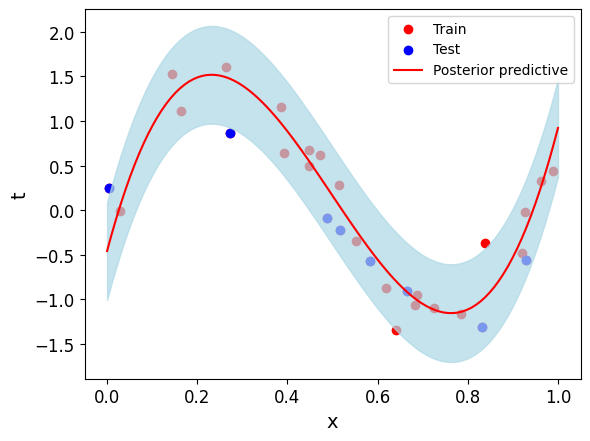

In [72]:
xx = np.linspace(0, 1, 100).reshape([-1, 1])

Phi_xx = model.Phi(xx)

tt = np.dot(Phi_xx, muN)

plt.scatter(x, t, c="red", label="Train")
plt.scatter(x_test, t_test, c="blue", label="Test")
plt.plot(xx, tt, c="red", label="Posterior predictive")
plt.fill_between(
    xx.flatten(),
    tt.flatten() + np.sqrt(1 / beta),
    tt.flatten() - np.sqrt(1 / beta),
    color="LightBlue",
    alpha=0.7,
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

#### Posterior predictive function

We can also solve the integral numerically. A particularly useful technique is Importance Sampling where we sample points from the posterior

In [73]:
from scipy.stats import norm, multivariate_normal

Nsample = 1000
w_sampled = multivariate_normal(mean=muN[:, 0], cov=SN).rvs(Nsample)

And use those points to compute the integral as a expected value

$$p(t_{N+1}|x_{N+1},x_{1,...,N},t_{1,...,N},\gamma,\beta)\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mathcal{N}(t_{N+1}|y(x_{N+1},\vec{w}_{j}),\beta)$$

Thus

$$\mathbf{E}[t_{N+1}]\approx \frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\vec{w}_{j}^{T}\cdot \vec{\phi}(x_{N+1})=\frac{1}{N_{\text{samples}}}\sum_{j=1}^{N_{\text{samples}}}\mu_{j}$$

and the associated error is
$$\text{Var}[t_{N+1}]\approx \frac{1}{\beta}+\frac{1}{N_{\text{samples}}}(\sum_{j}\mu^{2}_{j}-\frac{1}{N_{\text{samples}}}(\sum_{l}\mu_{l})^{2})$$



In [74]:
mus = np.dot(w_sampled, Phi_xx.T)
print(mus.shape)
tt = np.mean(mus, axis=0)
print(tt.shape)

(1000, 100)
(100,)


In [75]:
sum_mu = np.sum(mus, axis=0)
sum_mu_sqr = np.sum(
    np.asarray([mus[:, i] * mus[:, i] for i in range(mus.shape[1])]).T, axis=0
)
yerror = np.sqrt(1.0 / beta + (1.0 / Nsample) * (sum_mu_sqr - (1.0 / Nsample) * sum_mu))

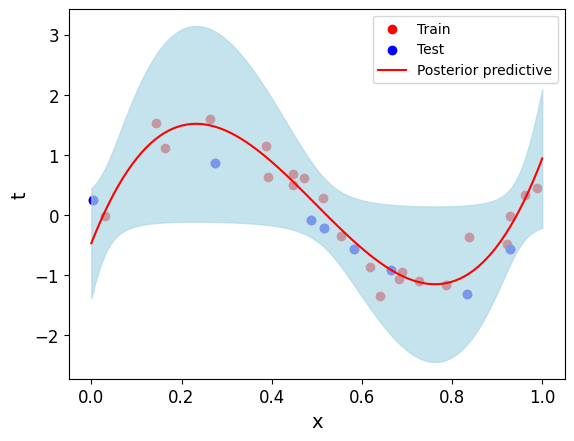

In [76]:
plt.scatter(x, t, c="red", label="Train")
plt.scatter(x_test, t_test, c="blue", label="Test")
plt.plot(xx, tt, c="red", label="Posterior predictive")
plt.fill_between(
    xx.flatten(),
    tt.flatten() + yerror.flatten(),
    tt.flatten() - yerror.flatten(),
    color="LightBlue",
    alpha=0.7,
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

This is very useful but we're not taking advantage of our beautiful conjugated prior! We can still solve this analytically:

$$
p(t_{N+1} | x_{N+1}, t_{1,...,N}, x_{1,...,N}, \gamma, \beta) = \mathcal{N}(t_{N+1} | \vec{\mu}_N^{T} \vec{\phi}(x_{N+1}), \sigma_N^2)\;\;,
$$

with associated variance

$$
\sigma_N^2 = \frac{1}{\beta} + \vec{\phi}(x_{N+1})^{T} \mathbf{S}_N \vec{\phi}(x_{N+1})\;\;,
$$

which captures both the stochastic error and the posterior error.

In [77]:
mupred = np.dot(muN.T, Phi_xx.T).T
aux = np.asarray(
    list(
        map(
            lambda i: np.dot(Phi_xx[i, :], np.dot(SN, Phi_xx[i, :])),
            range(Phi_xx.shape[0]),
        )
    )
)
sigmapred = np.sqrt(1.0 / beta + aux)

In [78]:
sigmapred.shape

(100,)

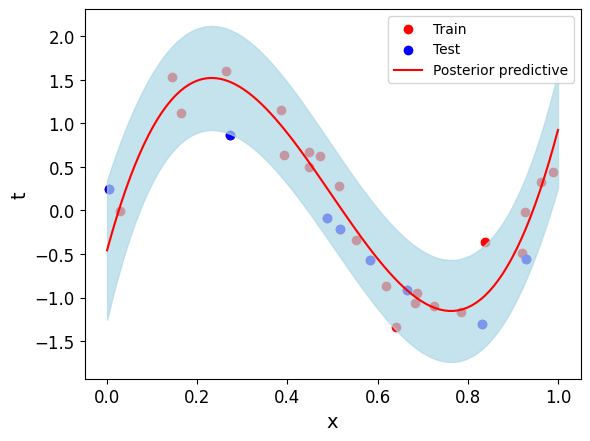

In [79]:
plt.scatter(x, t, c="red", label="Train")
plt.scatter(x_test, t_test, c="blue", label="Test")
plt.plot(xx, mupred, c="red", label="Posterior predictive")
plt.fill_between(
    xx.flatten(),
    mupred.flatten() + sigmapred.flatten(),
    mupred.flatten() - sigmapred.flatten(),
    color="LightBlue",
    alpha=0.7,
)
plt.legend()
plt.xlabel("x")
plt.ylabel("t")
plt.show()

#### Exercise

Re-do the full posterior predictive analysis with only two points. Explain the results.

In [80]:
###SOLUTION_START
###SOLUTION_STOP